In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import seaborn as sns
import json
from io import StringIO
import importlib

In [12]:
import molten_data_common_lib
importlib.reload(molten_data_common_lib)
from molten_data_common_lib import glob_file_list , load_json_from_file, merge_dicts, plot_groups, get_varying_column_names, filter_dataframe

In [13]:
src_files = []
src_files += ['../p3_test_driver/logs/workload-*.json']
filenames = glob_file_list(src_files)
print('Loading records from %d files...' % len(filenames))
raw_results = [load_json_from_file(filename) for filename in filenames]

Loading records from 54 files...


In [14]:
raw_df = pd.DataFrame(raw_results)
raw_df.head()

,workload,driver,publishRate,consumeRate,backlog,publishLatencyAvg,publishLatency50pct,publishLatency75pct,publishLatency95pct,publishLatency99pct,...,endToEndLatencyMax,aggregatedEndToEndLatencyQuantiles,aggregatedEndToEndLatencyAvg,aggregatedEndToEndLatency50pct,aggregatedEndToEndLatency75pct,aggregatedEndToEndLatency95pct,aggregatedEndToEndLatency99pct,aggregatedEndToEndLatency999pct,aggregatedEndToEndLatency9999pct,aggregatedEndToEndLatencyMax
0,"{""test_uuid"": ""d339700b-d264-4273-9354-6822d98...",Pravega,"[147264.7093304206, 140027.55605209345, 140627...","[155853.02125116036, 139971.68078006987, 14061...","[131, 697, 793, 487, 59339, 577, 390, 352, 154...","[63.34134565193606, 119.67117197177528, 70.482...","[62.068, 68.145, 65.063, 65.737, 69.945, 66.81...","[80.992, 92.01, 85.561, 86.862, 96.462, 88.881...","[107.756, 605.803, 123.005, 132.045, 785.871, ...","[129.795, 1002.271, 286.581, 390.719, 1218.591...",...,"[978.003, 1805.007, 578.003, 706.003, 2034.007...","{'4.743686258346546E-6': 6.0, '0.5220853659073...",1.126457e+02,7.200000e+01,9.500000e+01,4.230010e+02,1.025003e+03,1.519007e+03,1.881007e+03,2.180015e+03
1,"{""test_uuid"": ""e1ddcd4b-f026-40e4-a7ac-9491f27...",Pravega,"[1025.7321657806665, 999.7523077047571, 1001.8...","[1026.7223503214336, 998.5649534200721, 1002.6...","[9, 21, 13, -41, 11, 1, 0, 7, 6, 12, 9, 17, 3,...","[5.062081223838947, 105.57459693221178, 5.0927...","[4.519, 4.984, 4.515, 4.532, 4.514, 4.784, 4.7...","[5.704, 7.734, 5.704, 5.732, 5.655, 6.292, 6.1...","[8.717, 761.403, 8.917, 8.706, 8.377, 11.002, ...","[12.278, 1214.087, 12.567, 13.207, 11.312, 34....",...,"[188.0, 1575.007, 273.001, 184.0, 119.0, 162.0...","{'0.3672023310229129': 3.0, '7.405633305372831...",2.034345e+01,7.000000e+00,1.400000e+01,5.600000e+01,2.110000e+02,1.327007e+03,2.064007e+03,2.312015e+03
2,"{""test_uuid"": ""f7d4c6ec-bf91-46b4-8c53-6a68778...",Pravega,"[40761.03762813515, 38907.572875620346, 38819....","[40702.32754959566, 38901.50393716768, 38457.2...","[2096, 2158, 5854, 2969, 629, 1717, 391, 666, ...","[104.58645295362273, 111.14492876245683, 92.14...","[55.051, 56.858, 47.712, 48.487, 52.504, 47.57...","[164.785, 167.022, 150.787, 149.804, 159.772, ...","[289.483, 310.897, 261.275, 259.639, 277.661, ...","[449.935, 585.739, 307.757, 308.573, 416.251, ...",...,"[43200020.479, 43200020.479, 43200020.479, 432...",{'100.0': 43200020.479},4.319989e+07,4.320002e+07,4.320002e+07,4.320002e+07,4.320002e+07,4.320002e+07,4.320002e+07,4.320002e+07
3,"{""test_uuid"": ""14e7a7fe-071a-4f9b-9904-638934d...",Pravega,"[51.17113454488346, 50.16466209152592, 49.7977...","[51.86397389075229, 49.96716342187424, 49.5013...","[3, 5, 8, 26, 22, 13, 17, 12, 5, 18, 5, 13, 0,...","[51.886329341317364, 46.787041338582675, 122.0...","[21.771, 21.175, 22.335, 40.631, 21.164, 38.40...","[47.31, 41.634, 62.744, 49.124, 45.793, 53.373...","[192.233, 155.483, 699.631, 88.55, 695.151, 40...","[359.423, 491.301, 1087.079, 356.017, 1022.415...",...,"[992.003, 1121.007, 1320.007, 881.003, 1154.00...","{'0.028284307200851858': 22.0, '0.699897954656...",9.171110e+01,3.400000e+01,6.100000e+01,4.190010e+02,8.580030e+02,1.413007e+03,2.079007e+03,2.566015e+03
4,"{""test_uuid"": ""b8fc5bd5-d0b9-4468-99a1-75a0efc...",Pravega,"[18890.90020224249, 18276.629932488388, 18339....","[18927.93807615282, 18276.82686513785, 18322.8...","[43, 41, 212, 125, 192, 480, 521, 332, 277, 95...","[30.48899914947322, 28.969191902925587, 62.113...","[24.874, 24.728, 27.365, 25.088, 24.334, 25.88...","[34.781, 34.109, 43.77, 35.826, 33.282, 37.477...","[77.503, 68.904, 321.825, 90.04, 64.902, 109.6...","[121.498, 100.254, 606.583, 216.95, 94.422, 43...",...,"[43200020.479, 43200020.479, 43200020.479, 432...",{'100.0': 43200020.479},4.319989e+07,4.320002e+07,4.320002e+07,4.320002e+07,4.320002e+07,4.320002e+07,4.320002e+07,4.320002e+07


In [15]:
def clean_result(result):
    r = result.copy()
    workload = json.load(StringIO(r['workload']))
    r = merge_dicts(r, workload)
    r = merge_dicts(r, r['workload'])
    del r['workload']
    r['driverName'] = r['driver']['name']
    del r['driver']
    for k in list(r.keys()):
        if 'Quantiles' in k:
            r[k] = pd.Series(data=[float(q) for q in r[k].keys()], index=list(r[k].values()))
        elif isinstance(r[k], list):
            r[k] = pd.Series(r[k])
            r['%sMean' % k] = r[k].mean()
    r['numWorkloadWorkers'] = int(r.get('numWorkers', 0))
    r['throttleEventsPerSec'] = r['producerRate']
    r['publishRateEventsPerSecMean'] = r['publishRateMean']
    r['publishRateMBPerSecMean'] = r['publishRateMean'] * r['messageSize'] * 1e-6
    r['publishLatencyMsAvg'] = r['aggregatedPublishLatencyAvg']
    r['publishLatencyMs99Pct'] = r['aggregatedPublishLatency99pct']
    r['endToEndLatencyMsAvg'] = r['aggregatedEndToEndLatencyAvg']
    r['endToEndLatencyMs99Pct'] = r['aggregatedEndToEndLatency99pct']
    return pd.Series(r)
# r = clean_result(raw_results[0])
# pd.DataFrame(r)

In [16]:
clean_df = raw_df.apply(clean_result, axis=1)
clean_df = clean_df.sort_values(['utc_begin'])
# clean_df.tail()

In [17]:
clean_df.columns

Index(['publishRate', 'consumeRate', 'backlog', 'publishLatencyAvg',
       'publishLatency50pct', 'publishLatency75pct', 'publishLatency95pct',
       'publishLatency99pct', 'publishLatency999pct', 'publishLatency9999pct',
       'publishLatencyMax', 'aggregatedPublishLatencyAvg',
       'aggregatedPublishLatency50pct', 'aggregatedPublishLatency75pct',
       'aggregatedPublishLatency95pct', 'aggregatedPublishLatency99pct',
       'aggregatedPublishLatency999pct', 'aggregatedPublishLatency9999pct',
       'aggregatedPublishLatencyMax', 'aggregatedPublishLatencyQuantiles',
       'endToEndLatencyAvg', 'endToEndLatency50pct', 'endToEndLatency75pct',
       'endToEndLatency95pct', 'endToEndLatency99pct', 'endToEndLatency999pct',
       'endToEndLatency9999pct', 'endToEndLatencyMax',
       'aggregatedEndToEndLatencyQuantiles', 'aggregatedEndToEndLatencyAvg',
       'aggregatedEndToEndLatency50pct', 'aggregatedEndToEndLatency75pct',
       'aggregatedEndToEndLatency95pct', 'aggregatedEndT

In [28]:
info_cols = [
    'numWorkers',
    'topics',
    'partitionsPerTopic',
    'subscriptionsPerTopic',
    'consumerPerSubscription',
    'testDurationMinutes',
    'keyDistributor',
    'git_commit',    
]

In [18]:
cols = [
    'messageSize',
    'numWorkloadWorkers',
    'producersPerTopic',
    'partitionsPerTopic',
    'testDurationMinutes',
    'subscriptionsPerTopic',
    'throttleEventsPerSec',
    'publishRateEventsPerSecMean',
    'publishRateMBPerSecMean',
    'publishLatencyMsAvg',
    'publishLatencyMs99Pct',
    'endToEndLatencyMsAvg',
    'endToEndLatencyMs99Pct',
    'utc_begin',
]

In [19]:
clean_df[cols].to_csv('openmessaging-benchmark-results.csv')

In [20]:
#df = clean_df[cols]
#df = df.sort_values(['messageSize','numWorkloadWorkers','producersPerTopic','throttleEventsPerSec','utc_begin'])
#df

In [21]:
messageSize = 100
filt_df = filter_dataframe(
    clean_df,
    messageSize=messageSize, 
    numWorkloadWorkers=2, 
    partitionsPerTopic=16,
    testDurationMinutes=15,
)
filt_df[cols]

,messageSize,numWorkloadWorkers,producersPerTopic,partitionsPerTopic,testDurationMinutes,subscriptionsPerTopic,throttleEventsPerSec,publishRateEventsPerSecMean,publishRateMBPerSecMean,publishLatencyMsAvg,publishLatencyMs99Pct,endToEndLatencyMsAvg,endToEndLatencyMs99Pct,utc_begin
1,100,2,16,16,15,1,1000.0,1000.347395,0.100035,11.178380,177.408,20.343454,211.000,2019-09-26T23:24:33.465907
8,100,2,16,16,15,1,3000.0,3004.150927,0.300415,15.288108,240.731,20.101685,261.000,2019-09-26T23:41:01.235023
22,100,2,16,16,15,1,10000.0,10003.796508,1.000380,56.831832,324.145,60.635674,341.001,2019-09-26T23:57:30.594010
27,100,2,16,16,15,1,30000.0,30139.792398,3.013979,69.901996,422.271,74.330639,442.001,2019-09-27T00:14:01.222550
16,100,2,16,16,15,1,100000.0,100079.943006,10.007994,103.466882,929.455,109.560962,957.003,2019-09-27T00:30:33.870376
40,100,2,16,16,15,1,-1.0,182150.575706,18.215058,123.455578,1048.943,171.651139,1613.007,2019-09-27T00:46:58.544387
10,100,2,16,16,15,1,30.0,30.020317,0.003002,6.171200,13.543,129.910964,1346.007,2019-09-27T01:08:54.400899
18,100,2,16,16,15,1,100.0,100.031103,0.010003,5.426569,11.253,73.311355,717.003,2019-09-27T01:25:27.145446
35,100,2,16,16,15,1,300.0,300.127243,0.030013,5.840281,11.274,32.175446,266.001,2019-09-27T01:41:57.459968
19,100,2,16,16,15,1,50000.0,50043.315549,5.004332,91.486967,764.887,96.230506,790.003,2019-09-27T01:58:26.931652


In [22]:
plot_df = (filt_df
    .set_index(['publishRateEventsPerSecMean'])
    .sort_index()
    [[
        'aggregatedPublishLatency50pct',
        'aggregatedPublishLatency95pct',
        'aggregatedPublishLatency99pct',
        'aggregatedEndToEndLatency50pct',
        'aggregatedEndToEndLatency95pct',
        'aggregatedEndToEndLatency99pct',
    ]]
    .rename(columns=dict(
        aggregatedPublishLatency50pct='Publish Latency p50',
        aggregatedPublishLatency95pct='Publish Latency p95',
        aggregatedPublishLatency99pct='Publish Latency p99',
        aggregatedEndToEndLatency50pct='E2E Latency p50',
        aggregatedEndToEndLatency95pct='E2E Latency p95',
        aggregatedEndToEndLatency99pct='E2E Latency p99',
    ))
    )
plot_df.index.name = 'Publish Throughput (events/s)'
plot_df

,Publish Latency p50,Publish Latency p95,Publish Latency p99,E2E Latency p50,E2E Latency p95,E2E Latency p99
Publish Throughput (events/s),,,,,,
30.020317,4.921,6.474,13.543,7.0,873.003,1346.007
100.031103,4.684,6.185,11.253,6.0,407.001,717.003
300.127243,4.638,6.242,11.274,6.0,154.000,266.001
1000.347395,4.554,9.670,177.408,7.0,56.000,211.000
3004.150927,8.369,25.472,240.731,12.0,35.000,261.000
10003.796508,47.446,112.843,324.145,51.0,118.000,341.001
30139.792398,58.865,123.942,422.271,63.0,130.000,442.001
50043.315549,72.561,153.846,764.887,76.0,163.000,790.003
75280.866695,81.649,192.948,815.547,86.0,206.000,851.003


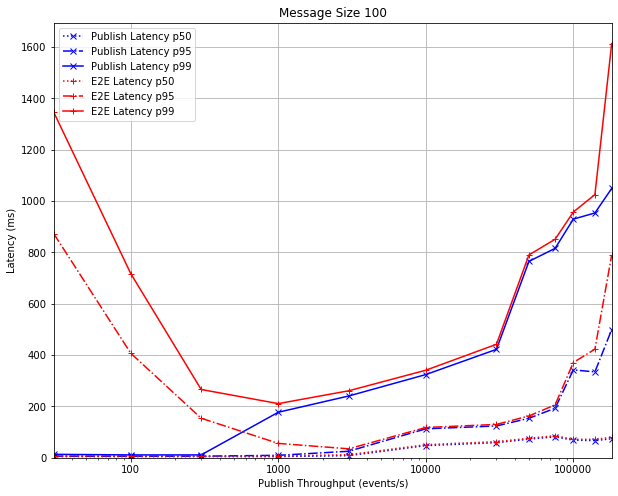

In [23]:
title = 'Message Size %d' % (messageSize)
ax = plot_df.plot(
    logx=True, 
    figsize=(10,8), 
    grid=True, 
    ylim=[0,None], 
    title=title, 
    style=['x:b','x-.b','x-b','+:r','+-.r','+-r'])
ax.set_ylabel('Latency (ms)');
ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=False))

In [32]:
filt_df[info_cols].drop_duplicates().T

,1
numWorkers,2
topics,1
partitionsPerTopic,16
subscriptionsPerTopic,1
consumerPerSubscription,16
testDurationMinutes,15
keyDistributor,NO_KEY
git_commit,52f3c9e Updated README.md\n


In [24]:
# plot_groups(
#     filt_df, 
#     x_col='publishRateEventsPerSecMean',
#     y_col='publishLatencyMs99Pct',
#     group_by_columns=['partitionsPerTopic', 'messageSize'],
#     semilogx=True,
# #     ylim=[0,100],
# );